In [205]:
library(readxl)
library(ggplot2)
library(writexl)
library(dplyr)
#install.packages("gridExtra")
library(gridExtra)
library(ggrepel)

In [206]:
df.class = read_excel("../../results/class.xlsx" ,sheet=1 )
df.scale = read_excel("../../results/class-scale.xlsx" ,sheet=1 )
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.fa <- read_excel("../../results/df-seven-scores.xlsx",sheet=1)
df.fa <- df.fa %>% 
  rename(
      'FarWell' = ML1,
      'Vended'= ML2,
      'PipedIndoors'= ML3,
      'NearbyImproved'= ML4,
      'PipedOutdoors' = ML5,
      'FarSpring' = ML6,
      'NearbySurface'= ML7
     )
df <- merge(x = df.class,
              y = df.fa,
              by = c("Country"))
df$clusters <- as.factor(df$clusters)

df <- df[,c(1,8,5,9, 12, 16:22 )] # 3 important explnatory variables from classification decision tree
head(df)


,Country,clusters,pcar,cgdp,popd,FarWell,FarSpring,PipedIndoors,PipedOutdoors,Vended,NearbySurface,NearbyImproved
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Decentralized,11.8,18353881130,56.93776,0.572418217,0.27948505,0.4740642,0.48905269,0.3327190,0.6406390,0.5244550
2,Albania,Hybrid,37.0,15147020535,104.61226,0.173347287,0.16631234,0.7812555,0.21604457,0.3179487,0.2668756,0.5813036
3,Angola,Decentralized,10.9,101353230785,24.71305,0.555402896,0.26567935,0.6221088,0.51799504,0.4010244,0.8739405,0.4280040
4,Armenia,Centralized,39.2,12457941907,103.68022,0.006249719,0.01802207,0.9992766,0.05567089,0.0000000,0.1978413,0.5088645
5,Azerbaijan,Centralized,20.4,47112941176,120.23432,0.172305543,0.17209406,0.6946237,0.41693952,0.2060016,0.4634648,0.4247652
6,Bangladesh,Hybrid,0.8,274039092455,1239.57931,0.116506831,0.08746231,0.0000000,0.29168400,0.1829046,0.1907371,0.5876124


# Scatter Analysis PCAR

In [207]:
# '#E41A1C':RED,'#377EB8':BLUE, '#4DAF4A':GREEN (Alphabatical order of cluster)


spd <- ggplot(df, aes(x=pcar, y= FarWell, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62')) + 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Far Well (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "none") 
    

sps <- ggplot(df, aes(x=pcar, y= FarSpring, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Far Spring (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spp <- ggplot(df, aes(x=pcar, y= PipedIndoors, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Piped Indoors (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)+ theme(legend.position = "none") 

spy <- ggplot(df, aes(x=pcar, y= PipedOutdoors, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Piped Outdoors (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)+ theme(legend.position = "none") 

sppw <- ggplot(df, aes(x=pcar, y= Vended, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(
       x="Private Car Ownership (Aggregation)", y = "Vended (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)+ theme(legend.position = "none")  

spns <- ggplot(df, aes(x=pcar, y= NearbySurface, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Nearby Surface (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spb <- ggplot(df, aes(x=pcar, y= NearbyImproved, color=clusters)) +
  geom_point() +
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Nearby Improved (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

options(repr.plot.width=14, repr.plot.height=14)
 

In [208]:
 options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)

pdf(file = "../../docs/manuscript/pdf-image/scatter-pcar-2.pdf"
  ,
  width     = 14,
  height    = 14 )

grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

png 
  2

png 
  2

In [ ]:
pdf(file = "../../docs/manuscript/pdf-image/scatter-pcar-1.pdf"
  ,
  width     = 14,
  height    = 14 )
grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

# Scatter Analysis CGDP

In [209]:
spd <- ggplot(df, aes(x=log(cgdp), y= FarWell, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $) ", y = "Faraway Well (scaled)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

sps <- ggplot(df, aes(x=log(cgdp), y= FarSpring, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $) ", y = "Far Spring (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spp <- ggplot(df, aes(x=log(cgdp), y= PipedIndoors, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Piped Indoors (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spy <- ggplot(df, aes(x=log(cgdp), y= PipedOutdoors, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Piped Outdoors (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

sppw <- ggplot(df, aes(x=log(cgdp), y= Vended, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Vended (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spns <- ggplot(df, aes(x=log(cgdp), y= NearbySurface, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Nearby Surface (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spb <- ggplot(df, aes(x=log(cgdp), y= NearbyImproved, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Nearby Improved (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

png 
  2

png 
  2

In [ ]:
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)



pdf(file = "../../docs/manuscript/pdf-image/scatter-cgdp-1.pdf"
  ,
  width     = 14,
  height    = 14 )

grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()





In [ ]:
pdf(file = "../../docs/manuscript/pdf-image/scatter-cgdp-2.pdf"
  ,
  width     = 14,
  height    = 14 )

grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

# Scatter popd

In [210]:
spd <- ggplot(df, aes(x=log(popd), y= FarWell, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people / sq. km of land area)", y = "Far Well (scaled)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 


sps <- ggplot(df, aes(x=log(popd), y= FarSpring, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people / sq. km of land area)", y = "Far Spring (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spp <- ggplot(df, aes(x=log(popd), y= PipedIndoors, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people / sq. km of land area)", y = "Piped Indoors (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spy <- ggplot(df, aes(x=log(popd), y= PipedOutdoors, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people / sq. km of land area)", y = "Piped Outdoors (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

sppw <- ggplot(df, aes(x=log(popd), y= Vended, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people/ sq. km of land area)", y = "Vended (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spns <- ggplot(df, aes(x=log(popd), y= NearbySurface, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people / sq. km of land area)", y = "Nearby Surface (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

spb <- ggplot(df, aes(x=log(popd), y= NearbyImproved, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people / sq. km of land area)", y = "Nearby Improved (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 




png 
  2

png 
  2

In [ ]:
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)


pdf(file = "../../docs/manuscript/pdf-image/scatter-popd-1.pdf"
  ,
  width     = 14,
  height    = 14 )

grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()




In [ ]:
pdf(file = "../../docs/manuscript/pdf-image/scatter-popd-2.pdf"
  ,
  width     = 14,
  height    = 14 )
grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

# unimproved or improved comparison

In [211]:
df.pro = read_excel("../../results/dfsimple.xlsx" ,sheet=1 )
df.pro <- df.pro[,c(1,4,15)]
df <- merge(x = df.class,
              y = df.pro,
              by = c("Country"))
df$clusters <- as.factor(df$clusters)
df <- df[,c(1,8,5,6,9,13,12,16:17)]

sp.pcar.imws <- ggplot(df, aes(x=pcar, y= imws, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Improved Households (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

sp.cgdp.imws <- ggplot(df, aes(x=log(cgdp), y= imws, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Improved Households (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

sp.popd.imws <- ggplot(df, aes(x=popd, y= imws, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people/sq. km of land area)", y = "Improved Households (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

sp.boat.imws <- ggplot(df, aes(x=boat, y= imws, color=clusters)) +
  geom_point() + 
    theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Boat Ownership (Percent)", y = "Improved Households (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 






png 
  2

In [ ]:
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)



pdf(file = "../../docs/manuscript/pdf-image/scatter-improve-importance.pdf"
  ,
  width     = 14,
  height    = 14 )


grid.arrange(sp.pcar.imws, sp.cgdp.imws ,sp.popd.imws,sp.boat.imws ,ncol=2, nrow=2, widths=c(5,5), heights=c(5,5))  
dev.off()

# Transportation

In [212]:
df.veh = read_excel("../../results/dfsimple.xlsx" ,sheet=1 )
df.veh <- df.veh[,c(1,4)]
df <- merge(x = df.class,
              y = df.veh,
              by = c("Country"))
head(df)

,Country,bicy,cart,mcyc,pcar,boat,wigc,clusters,cgdp,tpop,upop,popd,land,rifr,prec,imws
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,Decentralized,18353881130,37172386,25.495,56.93776,652860,1299.0269,327,71.2
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,Hybrid,15147020535,2866376,60.319,104.61226,27400,9361.5460,1485,98.4
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,Decentralized,101353230785,30809762,65.514,24.71305,1246700,4963.6533,1010,66.9
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,Centralized,12457941907,2951776,63.149,103.68022,28470,2329.1833,562,99.9
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,Centralized,47112941176,9939771,55.680,120.23432,82670,823.5207,447,90.6
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,Hybrid,274039092455,161356039,36.632,1239.57931,130170,657.6039,2666,97.8


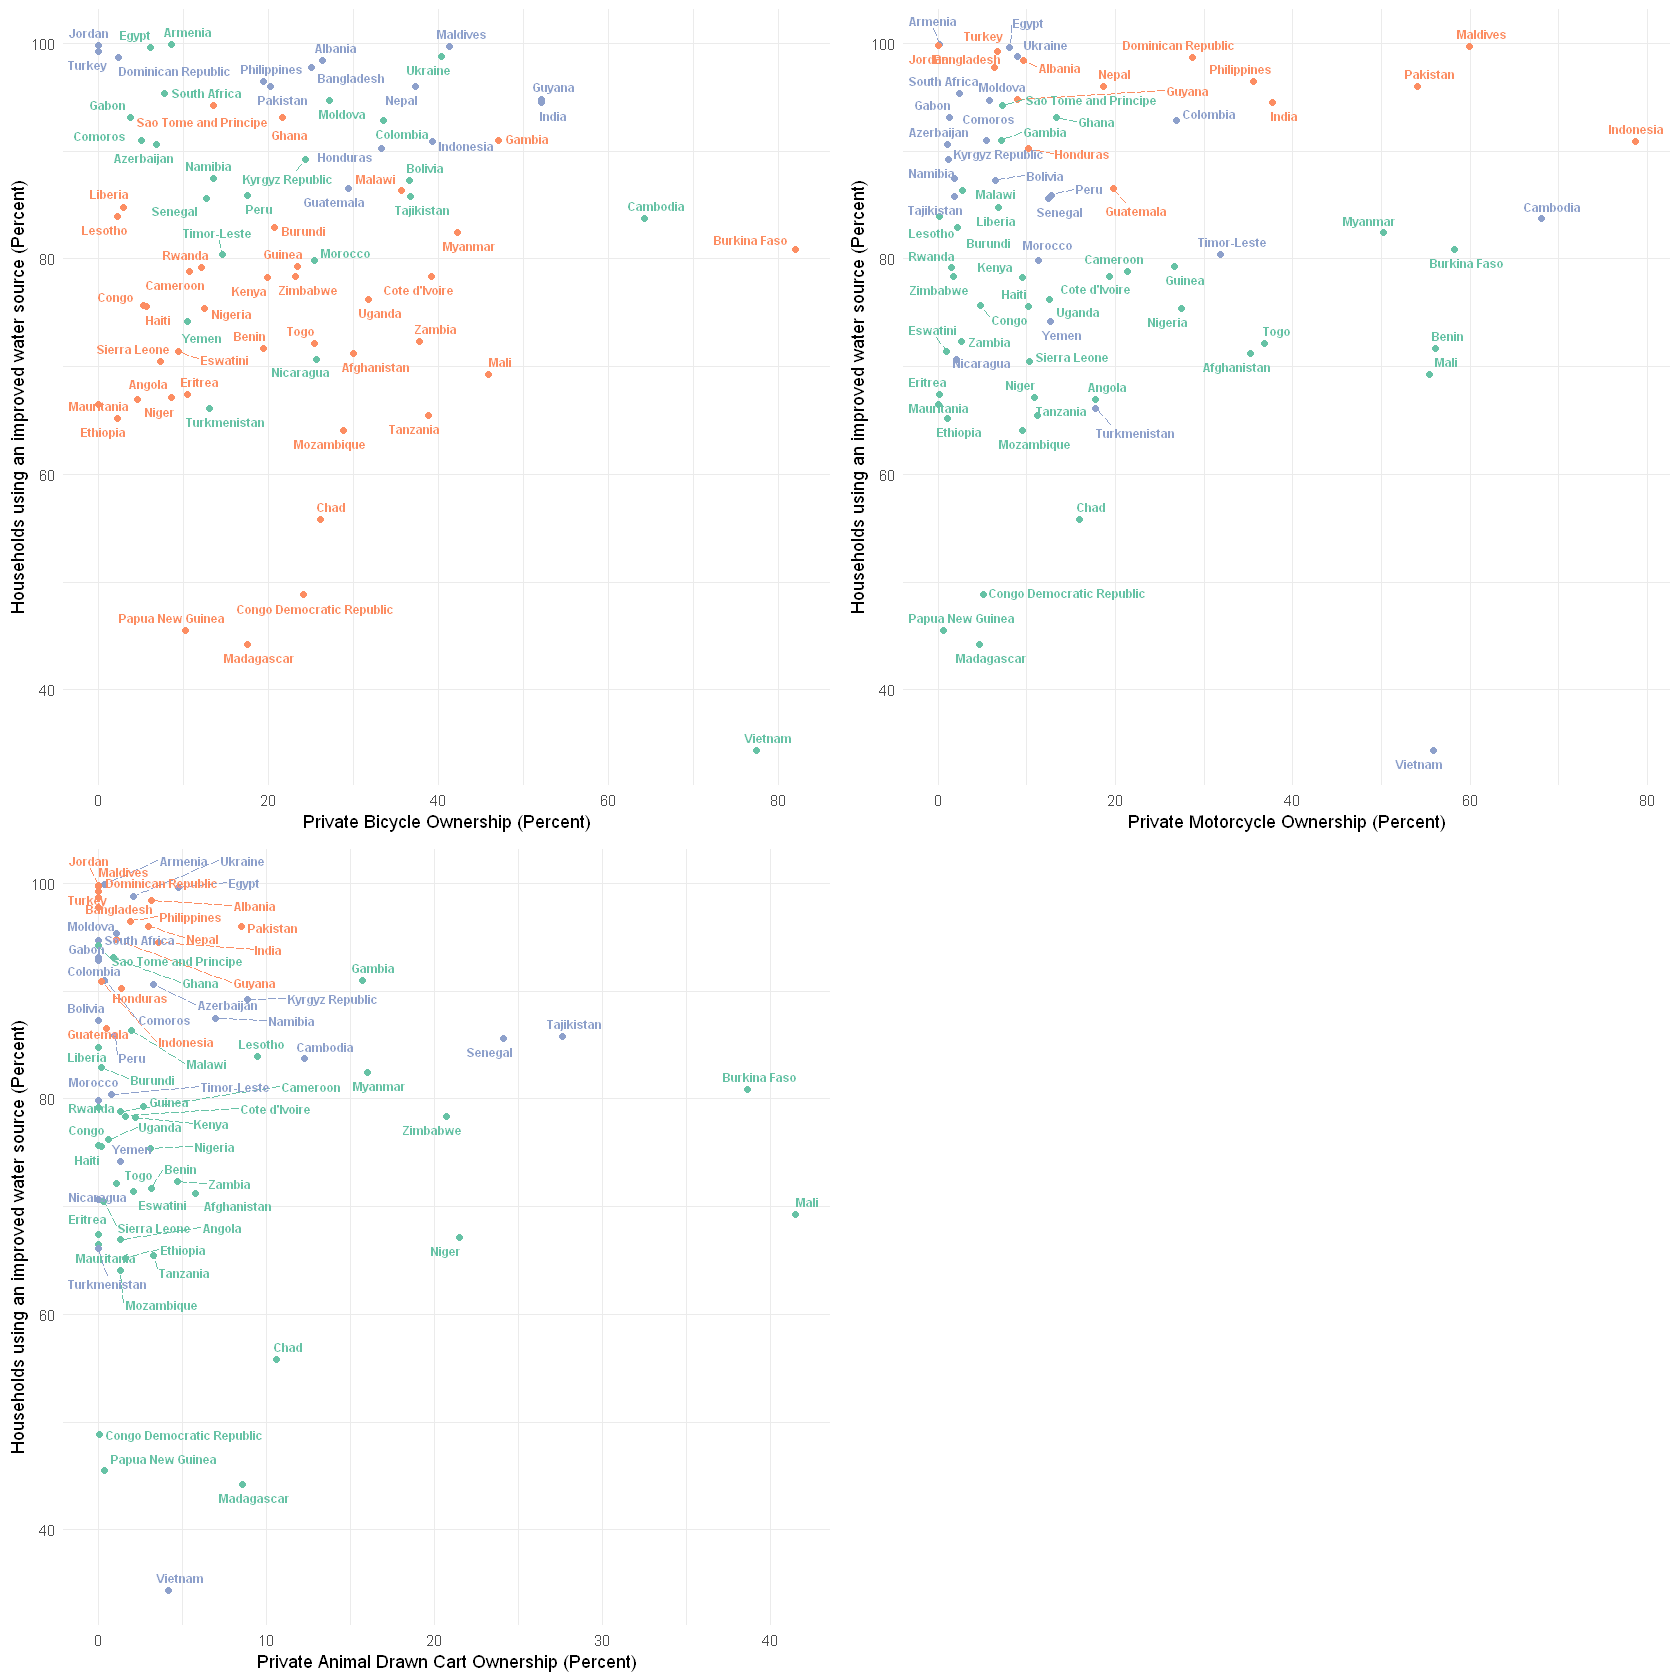

In [213]:
# '#E41A1C' - Red '#4DAF4A', - green  '#377EB8' - blue
sp.bicy.imws <- ggplot(df, aes(x=bicy, y= imws, color=clusters)) +
  geom_point() + 
    theme_minimal() +
  scale_color_manual(values=c('#66c2a5','#fc8d62', '#8da0cb'))+ 
  labs(title=,
       x="Private Bicycle Ownership (Percent)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

sp.mcyc.imws <- ggplot(df, aes(x=mcyc, y= imws, color=clusters)) +
  geom_point() + 
    theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Motorcycle Ownership (Percent)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

sp.cart.imws <- ggplot(df, aes(x=cart, y= imws, color=clusters)) +
  geom_point() + 
theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Animal Drawn Cart Ownership (Percent)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + theme(legend.position = "none") 

grid.arrange(sp.bicy.imws, sp.mcyc.imws ,sp.cart.imws ,ncol=2, nrow=2, widths=c(5,5), heights=c(5,5))

# Unscaled Comparison

In [214]:
df.class = read_excel("../../results/class.xlsx" ,sheet=1 )
df.scale = read_excel("../../results/class-scale.xlsx" ,sheet=1 )
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.fa <- read_excel("../../results/seven-scores-no-scale.xlsx",sheet=1)
df.fa <- df.fa %>% 
  rename(
      'FarWell' = ML1,
      'Vended'= ML2,
      'PipedIndoors'= ML3,
      'NearbyImproved'= ML4,
      'PipedOutdoors' = ML5,
      'FarSpring' = ML6,
      'NearbySurface'= ML7
     )
df <- merge(x = df.class,
              y = df.fa,
              by = c("Country"))
df$clusters <- as.factor(df$clusters)

df <- df[,c(1,8,5,9, 12, 16:22 )] # 3 important explnatory variables from classification decision tree
head(df)

,Country,clusters,pcar,cgdp,popd,FarWell,FarSpring,PipedIndoors,PipedOutdoors,Vended,NearbySurface,NearbyImproved
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Decentralized,11.8,18353881130,56.93776,0.7697168,0.12589699,-0.5933418,0.1264002,0.2423144,1.1555535,-0.1981812
2,Albania,Hybrid,37.0,15147020535,104.61226,-0.9038761,-0.51186772,1.0624723,-1.2283912,0.1420495,-0.5949199,0.0954210
3,Angola,Decentralized,10.9,101353230785,24.71305,0.6983592,0.04809742,0.2046444,0.2700254,0.7059897,2.2481914,-0.6963152
4,Armenia,Centralized,39.2,12457941907,103.68022,-1.6046370,-1.34753126,2.2376438,-2.0242389,-2.0162709,-0.9182333,-0.2787008
5,Azerbaijan,Centralized,20.4,47112941176,120.23432,-0.9082449,-0.47928590,0.5955123,-0.2314584,-0.6178773,0.3257808,-0.7130428
6,Bangladesh,Hybrid,0.8,274039092455,1239.57931,-1.1422493,-0.95621309,-3.1486294,-0.8530337,-0.7746654,-0.9515049,0.1280032


In [ ]:
# '#E41A1C':RED,'#377EB8':BLUE, '#4DAF4A':GREEN (Alphabatical order of cluster)
# \textit{Far Well} score plotted against household private car ownership.
spd <- ggplot(df, aes(x=pcar, y= FarWell , color=clusters)) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62')) + 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Far Well" ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=pcar, y= FarWell), method = 'gam' ,color = 'gray' )


pdf(file = "../../docs/manuscript/pdf-image/scatter-car-farwell.pdf"
  ,
  width     = 10,
  height    = 7 )

spd

dev.off()

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



png 
  2

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



png 
  2

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



In [ ]:
#\textit{Far Spring} score plotted against household private car ownership.
sps <- ggplot(df, aes(x=pcar, y= FarSpring, color=clusters)) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Far Spring" ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=pcar, y= FarSpring ), method = 'gam' ,color = 'gray' ) 


pdf(file = "../../docs/manuscript/pdf-image/scatter-car-spring.pdf"
  ,
  width     = 10,
  height    = 10 )

sps

dev.off()

 

In [ ]:
# \textit{Piped Indoors} score plotted against household private car ownership.
spp <- ggplot(df, aes(x=pcar, y= PipedIndoors, color=clusters)) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Piped Indoors" ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=pcar, y= PipedIndoors ), method = 'gam' ,color = 'gray' ) 

pdf(file = "../../docs/manuscript/pdf-image/scatter-car-indoors.pdf"
  ,
  width     = 10,
  height    = 10 )
spp
dev.off()


In [ ]:
# \textit{Piped Outdoors} score plotted against household private car ownership.
spy <- ggplot(df, aes(x=pcar, y= PipedOutdoors, color=clusters)) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Piped Outdoors" ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=pcar, y= PipedOutdoors ), method = 'gam' ,color = 'gray' ) 

pdf(file = "../../docs/manuscript/pdf-image/scatter-car-outdoors.pdf"
  ,
  width     = 10,
  height    = 10 )
spy
dev.off()


In [ ]:
#\textit{Vended} plotted against household private car ownership.

sppw <- ggplot(df, aes(x=pcar, y= Vended, color=clusters)) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Vended" ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=pcar, y= Vended), method = 'gam' ,color = 'gray' ) 

pdf(file = "../../docs/manuscript/pdf-image/scatter-car-vended.pdf"
  ,
  width     = 10,
  height    = 10 )
sppw
dev.off()

In [ ]:
# \textit{Nearby Surface} score plotted against household private car ownership
spns <- ggplot(df, aes(x=pcar, y= NearbySurface, color=clusters)) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Nearby Surface" ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=pcar, y= NearbySurface ), method = 'gam' ,color = 'gray' ) 

pdf(file = "../../docs/manuscript/pdf-image/scatter-car-surface.pdf"
  ,
  width     = 10,
  height    = 10 )
spns
dev.off()


In [ ]:
# \textit{Nearby Improved} score plotted against household private car ownership.
spb <- ggplot(df, aes(x=pcar, y= NearbyImproved, color=clusters)) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Nearby Improved" ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=pcar, y= NearbyImproved), method = 'gam' ,color = 'gray' ) 

pdf(file = "../../docs/manuscript/pdf-image/scatter-car-improved.pdf"
  ,
  width     = 10,
  height    = 10 )
spb
dev.off()

In [ ]:
df.class = read_excel("../../results/class.xlsx" ,sheet=1 )
df.scale = read_excel("../../results/class-scale.xlsx" ,sheet=1 )
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.fa <- read_excel("../../results/seven-scores-no-scale.xlsx",sheet=1)
df.fa <- df.fa %>% 
  rename(
      'Far Well' = ML1,
      'Vended'= ML2,
      'Piped Indoors'= ML3,
      'Nearby Improved'= ML4,
      'Piped Outdoors' = ML5,
      'Far Spring' = ML6,
      'Nearby Surface'= ML7
     )
df <- merge(x = df.class,
              y = df.fa,
              by = c("Country"))
df$clusters <- as.factor(df$clusters)

df <- df[,c(1,8,5,9, 12, 16:22 )] # 3 important explnatory variables from classification decision tree
var_list = combn(names(df)[6:13], 2, simplify=FALSE)
# Make plots.
plot_list = list()

# Selected water accessibility factors plotted against GDP (log scale).
for(i in 6:13){
 p = ggplot(df, aes(x=log(cgdp), y= df[,i], colour=clusters) ) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="GDP (current US $)" ,y = names(df)[i] ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=log(cgdp), y= df[,i]), method = 'gam' ,color = 'gray' ) 
    
    plot_list[[i]] = p
    }

# for (i in 6:13) {
#     print(plot_list[[i]])
# }


for (i in 6:13) {
    file_name = paste("../../docs/manuscript/pdf-image/scatter-cgdp", names(df)[i], ".pdf", sep="")
    pdf(file_name,  
    width     = 10,
    height    = 10)
    print(plot_list[[i]])
    dev.off()
}
dev.off()

In [ ]:
# Selected water accessibility factors plotted against Population Density.
for(i in 6:13){
 p = ggplot(df, aes(x=log(popd), y= df[,i], colour=clusters) ) +
  geom_point() + 
  theme_minimal() +
  scale_color_manual(values=c('#8da0cb','#66c2a5', '#fc8d62'))+ 
  labs(title=,
       x="Population Density (people/sq. km of land area)" ,y = names(df)[i] ,color = 'Typology') +
   geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf) + 
    theme(legend.position = "right") +
    theme(text = element_text(size=18)) + #Font size
    theme(axis.text = element_text(size = 16)) + #All tick size  
    theme(axis.title = element_text(size = 18)) + # Adjusting Axis Title  
    geom_smooth( aes(x=log(popd), y= df[,i]), method = 'gam' ,color = 'gray' ) 
    
    plot_list[[i]] = p
    }

# for (i in 6:13) {
#     print(plot_list[[i]])
# }


for (i in 6:13) {
    file_name = paste("../../docs/manuscript/pdf-image/scatter-popd", names(df)[i], ".pdf", sep="")
    pdf(file_name,  
    width     = 10,
    height    = 10)
    print(plot_list[[i]])
    dev.off()
}
dev.off()